In [24]:
import scipy as scp
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from cachetools import cached, TTLCache
import re
import csv

In [27]:
## First build dictionary
cache = TTLCache(maxsize=100, ttl=86400)
@cached(cache)
ens2gene={}
with open ("../data/Homo_sapiens.GRCh37.75.gtf", 'r') as file:
    for line in file:
        matches=re.findall('.*gene_id "(.*?)".*gene_name "(.*?)";',line)
        if matches:
            ens2gene[matches[0][0]]=matches[0][1]


SyntaxError: invalid syntax (<ipython-input-27-075385876a3d>, line 4)

In [3]:
ens2gene

{'ENSG00000223972': 'DDX11L1',
 'ENSG00000227232': 'WASH7P',
 'ENSG00000243485': 'MIR1302-10',
 'ENSG00000237613': 'FAM138A',
 'ENSG00000268020': 'OR4G4P',
 'ENSG00000240361': 'OR4G11P',
 'ENSG00000186092': 'OR4F5',
 'ENSG00000238009': 'RP11-34P13.7',
 'ENSG00000239945': 'RP11-34P13.8',
 'ENSG00000233750': 'CICP27',
 'ENSG00000237683': 'AL627309.1',
 'ENSG00000268903': 'RP11-34P13.15',
 'ENSG00000269981': 'RP11-34P13.16',
 'ENSG00000239906': 'RP11-34P13.14',
 'ENSG00000241860': 'RP11-34P13.13',
 'ENSG00000222623': 'RNU6-1100P',
 'ENSG00000241599': 'RP11-34P13.9',
 'ENSG00000228463': 'AP006222.2',
 'ENSG00000241670': 'AP006222.1',
 'ENSG00000237094': 'RP4-669L17.10',
 'ENSG00000250575': 'RP4-669L17.8',
 'ENSG00000233653': 'CICP7',
 'ENSG00000224813': 'RP4-669L17.4',
 'ENSG00000235249': 'OR4F29',
 'ENSG00000269732': 'WBP1LP7',
 'ENSG00000256186': 'AL732372.1',
 'ENSG00000236601': 'RP4-669L17.2',
 'ENSG00000236743': 'RP5-857K21.15',
 'ENSG00000236679': 'RP4-669L17.1',
 'ENSG00000231709': 

In [4]:
##Replacing ENSEMBLEID with HUGOID
list=[]
index=0
with open('../data/FPKM_data.csv','r') as csv_file:
    csv_reader=csv.reader(csv_file, delimiter=',')
    #Grab header for modified output file
    reader = csv.DictReader(csv_file)
    header = reader.fieldnames
    for row in csv_reader:
        ENSID=row[index].split('.')[0]
        row[index]=ENSID
        if row[index] in ens2gene:
            row[index]=ens2gene[row[index]]
            list.append(row)
##convert list of HUGOID rows to a dataframe to be exported into csv named original_filename.csv
df = pd.DataFrame(list,columns=header)

In [5]:
df

,gene_id,Sample_01,Sample_02,Sample_03,Sample_04,Sample_05,Sample_06,Sample_07,Sample_08,Sample_09,...,Sample_437,Sample_438,Sample_439,Sample_440,Sample_441,Sample_442,Sample_443,Sample_444,Sample_445,Sample_446
0,RP11-368I23.2,0.160575925597,0.0921585511178,5.1029,0.0,7.5945,0.0996366850656,0.0,0.0,0.0,...,10.2576,0.0,5.9366,5.889,0.0,6.9453,0.0223972549279,0.031289261188,0.383024453949,6.5464
1,RP11-742D12.2,0.0,0.0,0.3032,0.00415465538064,0.014,0.00345622661699,0.00852742878192,0.0,0.0,...,0.0849,0.00638800659019,0.0,0.0385,0.0,0.0,0.0,0.0,0.0106291718704,0.1049
2,RAB4B,2.17670041213,3.44032061412,30.5796,3.36413220626,57.05,4.41127060969,4.4443932141,4.83206316143,4.47904259723,...,40.4087,3.8441147984,21.3851,26.8799,4.6344890332,77.988,4.19665506421,8.00137220698,3.93726178596,26.7882
3,C12orf5,4.45023190424,3.92855166715,1.6419,3.6358237209,3.7194,2.7789010948,3.75291491897,1.8966294307,3.73029181865,...,2.577,2.69241481998,1.4271,1.3974,2.01922288609,5.2872,3.17199363291,3.7111361558,2.71677484008,2.608
4,RNF44,11.0685325958,15.0633640275,4.8157,10.1601767017,0.039,14.4171290669,11.6873564072,17.8999984205,8.46412298977,...,0.0721,13.2020255026,0.0,1.8239,10.4681420547,0.0222,12.5165436749,20.3431609406,10.5463685558,3.4507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54708,RP11-713D19.1,0.178417695108,0.0767987925981,0.0,0.0,0.0,0.083030570888,0.0,0.0,0.118438753587,...,0.0,0.153462111371,0.0,0.0,0.0,0.0,0.0,0.0,0.191512226974,0.0
54709,PPP6R1,15.3876521379,18.8157158528,0.0,11.3676117228,0.0,24.8666406443,13.6876760754,23.2055013917,16.3673793452,...,0.0,15.6758644436,0.0,0.0,10.8179592619,0.0,12.9936400308,26.5045661147,12.157695386,0.0
54710,RP4-569M23.2,0.0420154439557,0.0904264390459,0.0,0.164528027727,0.0,0.0879876198962,0.0241209801421,0.0850040461446,0.0418365746501,...,0.0,0.0722773459857,0.0,0.0,0.134483016943,0.0,0.0879052017625,0.0491218915279,0.255561368666,0.0
54711,BATF3,1.65291203422,1.50738507403,0.0,0.595544504346,0.0,0.651880265357,1.07760234285,0.558700965921,3.74738819357,...,0.0,1.59039466395,0.0,0.0,1.29616609075,0.0,1.20159250083,2.5220551554,0.872075949886,0.0


In [6]:
#load user input of gene list 
gene_list = open("../data/geneset.txt").read().splitlines()
gene_list

['ABCC6',
 'ABCC8',
 'APPL1',
 'ASXL1',
 'B9D1',
 'B9D2',
 'BICC1',
 'BLK',
 'CASR',
 'CC2D2A',
 'CCND1',
 'CDKN1C',
 'CEL',
 'CEP290',
 'CEP55',
 'CFTR',
 'CNOT1',
 'CP',
 'CPA1',
 'CSPP1',
 'CTRC',
 'DIS3L2',
 'DNAJC21',
 'DYNC2I1',
 'DZIP1L',
 'EFL1',
 'EIF2AK3',
 'ENPP1',
 'FANCD2',
 'FLI1',
 'FLNB',
 'FOXF1',
 'GABRD',
 'GANAB',
 'GATA6',
 'GCK',
 'GLIS3',
 'HNF1A',
 'HNF1B',
 'HNF4A',
 'IGF2',
 'INS',
 'KCNAB2',
 'KCNJ11',
 'KCNQ1',
 'KCNQ1OT1',
 'KLF11',
 'LHX1',
 'MKS1',
 'MYCN',
 'NEK1',
 'NEUROD1',
 'NPHP3',
 'OFD1',
 'PAX4',
 'PDX1',
 'PKD1',
 'PKD2',
 'PKHD1',
 'PRDM16',
 'PRSS1',
 'PRSS2',
 'PTF1A',
 'PTRH2',
 'RARB',
 'RBM8A',
 'RECQL4',
 'RERE',
 'RFX6',
 'RPGRIP1',
 'RPGRIP1L',
 'SBDS',
 'SETBP1',
 'SIK3',
 'SKI',
 'SLC29A3',
 'SPINK1',
 'SRP54',
 'STAT3',
 'STRA6',
 'TCTN2',
 'TELO2',
 'TMEM107',
 'TMEM216',
 'TMEM231',
 'TMEM67',
 'VHL',
 'WDPCP',
 'WDR19',
 'XPNPEP3']

In [7]:
# select genes from database from inputted gene list 
df_selected=df[df['gene_id'].isin(gene_list)]
df_selected

,gene_id,Sample_01,Sample_02,Sample_03,Sample_04,Sample_05,Sample_06,Sample_07,Sample_08,Sample_09,...,Sample_437,Sample_438,Sample_439,Sample_440,Sample_441,Sample_442,Sample_443,Sample_444,Sample_445,Sample_446
367,SPINK1,102.543822252,305.875165199,5.5631,251.837366614,4.4521,303.079480195,127.543496224,85.5989349822,191.166150253,...,6.5986,652.246739561,3.2519,6.6117,1237.12548847,4.9619,465.983817411,103.436589312,94.7038314401,7.5682
829,KCNJ11,0.972610319211,0.827097109048,14.6436,1.69199118402,15.2686,3.00278349249,0.871607552102,1.45352825614,0.141727272551,...,28.1645,3.85638215822,17.0674,18.5889,1.33222667933,15.117,0.565803312693,0.263478235597,3.50543884617,22.7792
1261,APPL1,10.5368675761,6.96378211478,0.2755,4.12914852581,0.0742,4.74765333416,5.62109723985,6.17825451286,6.99826016733,...,0.4339,10.0204889067,0.0808,0.0388,6.76414825852,0.7376,8.87466943984,6.78496039424,5.41342680542,0.3374
1717,GCK,0.474806624572,0.293668745495,0.0124,0.381657811044,0.2154,1.35151289513,0.137615984959,0.0692812141534,0.0428413832116,...,0.0087,0.547169493163,0.0202,0.0,0.370215355692,0.1277,0.146598238223,0.134736629327,1.12816591349,0.0322
1886,STRA6,3.43706956825,3.63325200811,0.0,17.7373378511,0.0,3.29792244905,4.24432641114,8.12139521213,4.13677765178,...,0.0,2.2018320671,0.0164,0.0,5.10775369553,0.0,5.49230786123,7.3406071524,4.22597006441,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49860,DIS3L2,1.67773538092,3.39369779665,0.0149,2.14712714671,0.031,2.26821327204,3.26770664748,2.08494330518,2.1762768382,...,0.0,2.66412499454,0.0121,0.0095,2.28049796781,0.0472,2.2049946344,2.81390836525,2.50670365712,0.0
50950,CEP290,2.18769498428,2.47860192569,0.0,1.36299013035,0.0,1.05554651439,2.19266396864,1.00025176181,1.50325320987,...,0.0,2.56452206618,0.0,0.0,1.66702896611,0.0,3.43054450215,1.71298765212,2.49485787712,0.0
54210,PRSS1,1.89010441975,318.516072659,4.2312,113.049594394,0.0,1173.06528186,7.69533449269,9.97561899529,0.27882338002,...,3.4171,1517.19309796,1.3223,2.2703,1631.65688275,0.7714,234.006971522,1.24901438101,6.93916623658,5.3467
54457,SIK3,5.00616034706,3.48434434132,35.8863,3.06430868784,0.5783,3.54520008155,3.02886617513,2.71173582749,5.38278104557,...,40.8883,6.05854924518,0.0,17.9927,2.84150456245,0.0,3.95075680951,4.53258759049,3.12789273858,34.6344


In [8]:
from scipy.cluster.hierarchy import dendrogram, linkage
df_selected = df_selected.set_index('gene_id')

In [15]:
linked = linkage(df_selected, 'ward')
np.log10(pd.DataFrame(linked))

,0,1,2,3
0,1.748188,1.770852,0.976282,0.301030
1,1.301030,1.908485,1.066328,0.301030
2,1.903090,1.934498,1.169296,0.477121
3,1.146128,1.812913,1.172454,0.301030
4,1.579784,1.880814,1.186985,0.301030
...,...,...,...,...
79,1.869232,2.212188,4.164736,0.477121
80,1.662758,1.913814,4.500020,0.301030
81,2.209515,2.214844,4.506374,1.913814
82,1.477121,2.220108,4.871854,1.919078


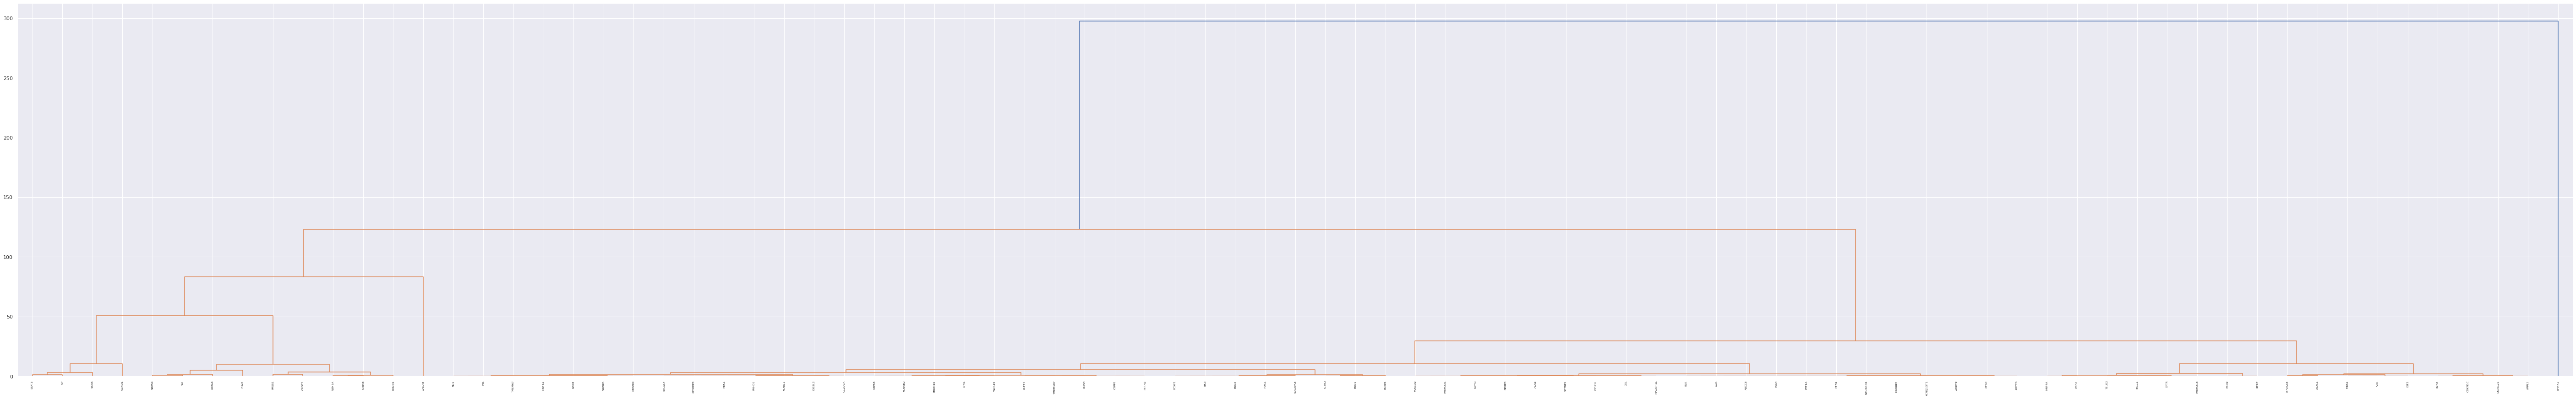

In [95]:
plt.figure(figsize=(100, 15))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True,labels=df_selected.index)
plt.show()

In [10]:
df_selected=df_selected.astype('float16')
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
Index: 85 entries, SPINK1 to FOXF1
Columns: 446 entries, Sample_01 to Sample_446
dtypes: float16(446)
memory usage: 74.7+ KB


In [21]:
#Log Scale the selected data
df_selected = (1+df_selected)/2 # (-1,1] -> (0,1]
df_selected=np.log(df_selected)

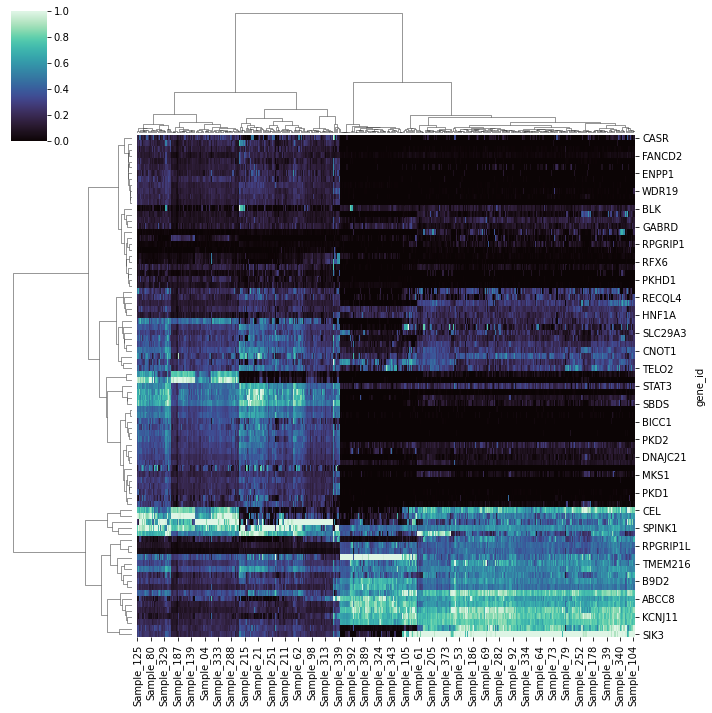

In [23]:
sns.clustermap(df_selected, metric="euclidean", standard_scale=1, method="ward",cmap="mako")

In [12]:
np.log10(df_selected)

,Sample_01,Sample_02,Sample_03,Sample_04,Sample_05,Sample_06,Sample_07,Sample_08,Sample_09,Sample_10,...,Sample_437,Sample_438,Sample_439,Sample_440,Sample_441,Sample_442,Sample_443,Sample_444,Sample_445,Sample_446
gene_id,,,,,,,,,,,,,,,,,,,,,
SPINK1,2.011719,2.486328,0.745117,2.400391,0.648438,2.480469,2.105469,1.932617,2.281250,1.749023,...,0.819336,2.814453,0.512207,0.820312,3.091797,0.695801,2.667969,2.015625,1.976562,0.878906
KCNJ11,-0.012039,-0.082397,1.166016,0.228516,1.183594,0.477295,-0.059692,0.162354,-0.848633,-1.104492,...,1.450195,0.585938,1.232422,1.269531,0.124512,1.179688,-0.247192,-0.579102,0.544922,1.357422
APPL1,1.022461,0.842773,-0.560059,0.615723,-1.129883,0.676270,0.750000,0.791016,0.845215,0.926270,...,-0.362793,1.000977,-1.092773,-1.411133,0.830078,-0.132080,0.948242,0.831543,0.733398,-0.471924
GCK,-0.323486,-0.532227,-1.906250,-0.418457,-0.666504,0.130859,-0.861328,-1.159180,-1.368164,-1.389648,...,-2.060547,-0.261719,-1.694336,-inf,-0.431641,-0.894043,-0.833984,-0.870605,0.052277,-1.492188
STRA6,0.536133,0.560059,-inf,1.249023,-inf,0.518555,0.627930,0.909668,0.616699,0.568359,...,-inf,0.342773,-1.785156,-inf,0.708496,-inf,0.739746,0.865723,0.625977,-inf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DIS3L2,0.224731,0.530762,-1.827148,0.331787,-1.508789,0.355469,0.514160,0.318848,0.337646,0.419189,...,-inf,0.425537,-1.916992,-2.021484,0.358154,-1.326172,0.343506,0.449463,0.398926,-inf
CEP290,0.339844,0.394287,-inf,0.134644,-inf,0.023529,0.341064,0.000000,0.176880,0.188354,...,-inf,0.408936,-inf,-inf,0.221924,-inf,0.535156,0.233765,0.396973,-inf
PRSS1,0.276367,2.503906,0.626465,2.052734,-inf,3.068359,0.886230,0.999023,-0.554688,0.287109,...,0.533691,3.181641,0.121338,0.355957,3.212891,-0.112671,2.369141,0.096558,0.841309,0.728027
